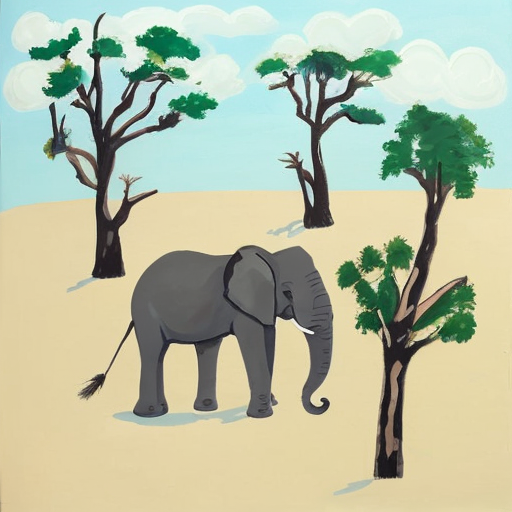

KeyboardInterrupt: 

In [46]:
import os, time, random, webuiapi
from pathlib import Path
from IPython.display import clear_output
from psd_tools import PSDImage
from shutil import copyfile

api = webuiapi.WebUIApi()

input_file = "0-input.psd"
prompt_file = "1-prompt.txt"
negative_prompt_file = "2-negative_prompt.txt"

example_dir = "example"
outputs_dir = "outputs"
if not os.path.exists(outputs_dir):
    os.makedirs(outputs_dir)

for filename in [input_file, prompt_file, negative_prompt_file]:
    if not os.path.exists(filename):
        example_filepath = os.path.join(example_dir, filename)
        if os.path.exists(example_filepath):
            print(f"Copying example {filename} to {os.getcwd()}")
            copyfile(example_filepath, filename)
        else:
            print(f"Could not find {filename} or a corresponding example in {example_dir}. Exiting...")
            exit()

input_file_new = 0
prompt_file_new = 0
negative_prompt_file_new = 0

while True:
    try:
        input_file_mtime = os.path.getmtime(input_file)
        prompt_file_mtime = os.path.getmtime(prompt_file)
        negative_prompt_file_mtime = os.path.getmtime(negative_prompt_file)

        if (input_file_mtime == input_file_new and 
            prompt_file_mtime == prompt_file_new and 
            negative_prompt_file_mtime == negative_prompt_file_new):
            time.sleep(1)
        else:
            input_file_new = input_file_mtime
            prompt_file_new = prompt_file_mtime
            negative_prompt_file_new = negative_prompt_file_mtime
            
            with open(prompt_file, "r") as f:
                prompt_txt = f.read()
            
            with open(negative_prompt_file, "r") as f:
                nprompt_txt = f.read()

            psd_file = PSDImage.open(input_file)
            psd_image = psd_file.composite()
            result = api.img2img(
                images=[psd_image],
                prompt=prompt_txt,
                negative_prompt=nprompt_txt,
                sampler_name='DPM++ 2M Karras',
                steps=30,
                seed=random.randint(1, 99999999),
                cfg_scale=5,
                width=512,
                height=512,
                denoising_strength=0.6)
            clear_output(wait=True)
            display(result.image)
            timestamp = str(int(time.time()))
            filename = f"gen_{timestamp}.png"
            filepath = os.path.join(outputs_dir, filename)
            result.image.save(filepath, "PNG")
    except Exception as e:
        print(f"An error occurred: {e}")
        continue